# Stroke Prediction Project


In [33]:
# Import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import ttest_ind

# Dataset Processing

In [74]:
# Data Processing:
data = pd.read_csv('DataSet/StrokeData.csv')   # this reads the dataset and stores it in data
data = data.drop(columns=['id'])   # drop 'id' column from the data since it is not used in the prediction
data['bmi'] = data['bmi'].fillna(data['bmi'].mean()) # Fill NaN value in 'bmi' column with its mean

OHT = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
OHT_transform = OHT.fit_transform(data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
data = pd.concat([data, OHT_transform], axis=1).drop(columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']) #concentation the two datasets and drop categories columns

# check for null data
print(f'dataset has no null value\n{data.isnull().sum()}')
data.to_csv('DataSet/StrokeData_processed.csv', index=False) # Save process data to file

dataset has no null value
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [76]:
# Output of processed data, top 5 rows
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# Output data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   float64
 7   gender_Male                     5110 non-null   float64
 8   gender_Other                    5110 non-null   float64
 9   ever_married_No                 5110 non-null   float64
 10  ever_married_Yes                5110 non-null   float64
 11  work_type_Govt_job              5110 non-null   float64
 12  work_type_Never_worked          51

In [78]:
# Output data statistic information
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.585910,0.413894,0.000196,0.343836,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.492612,0.492578,0.013989,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


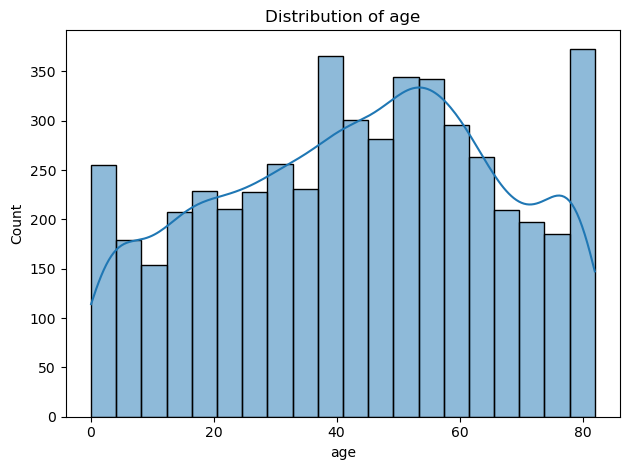

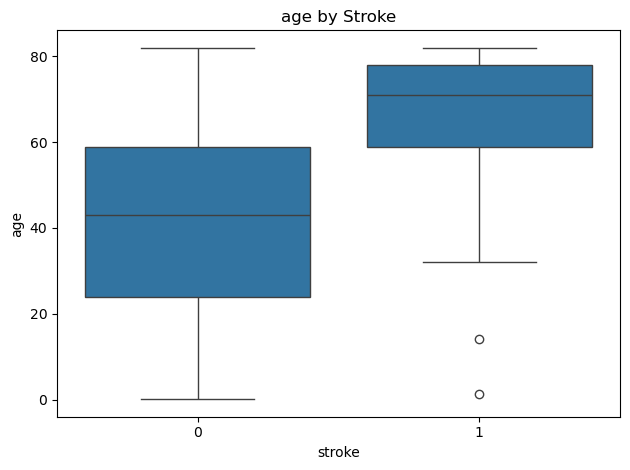

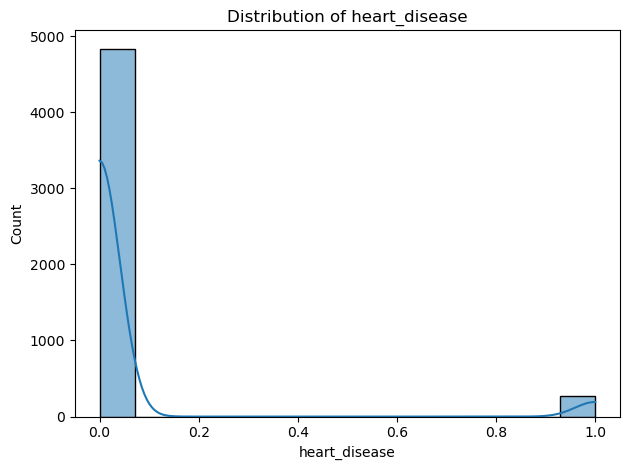

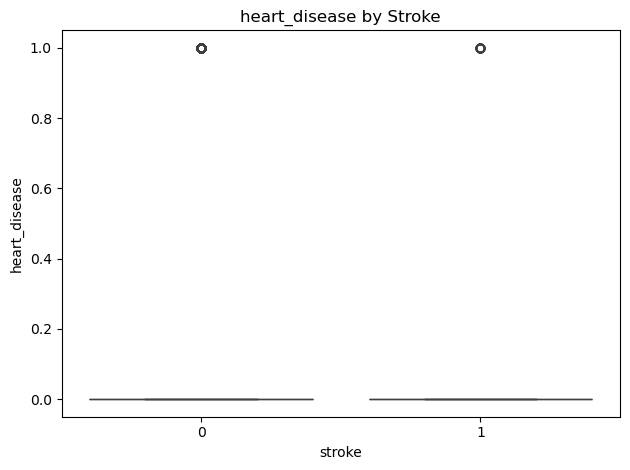

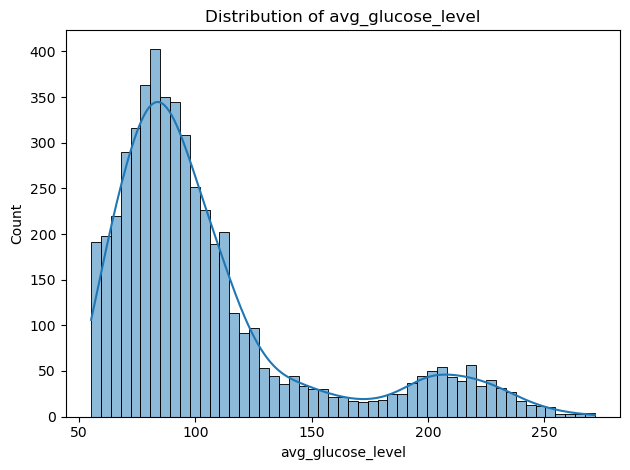

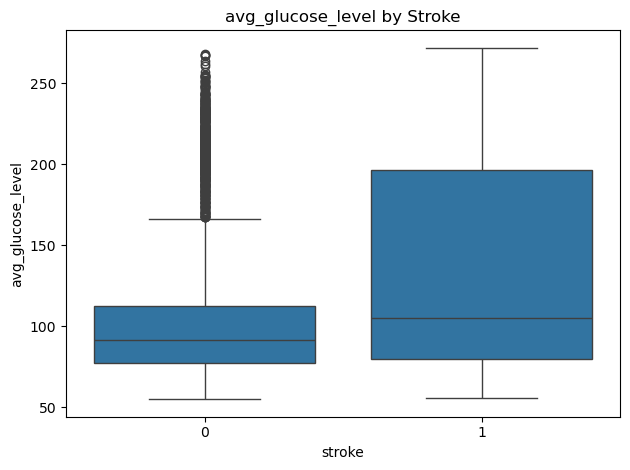

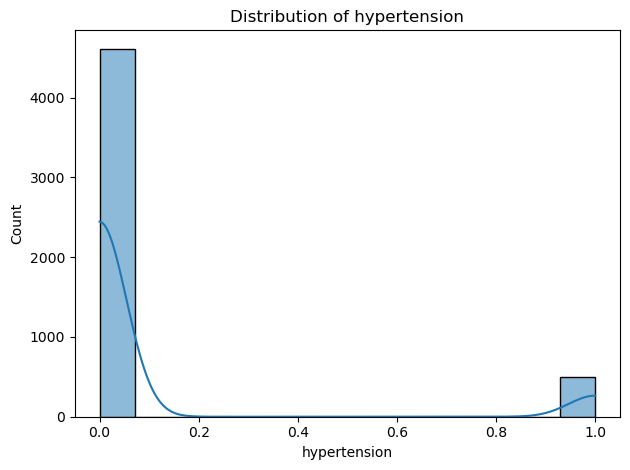

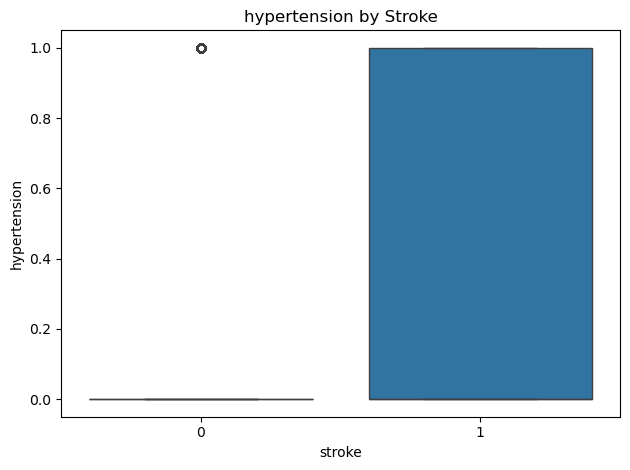

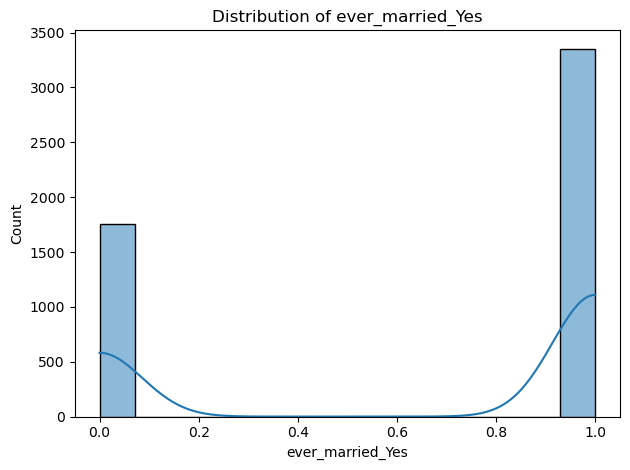

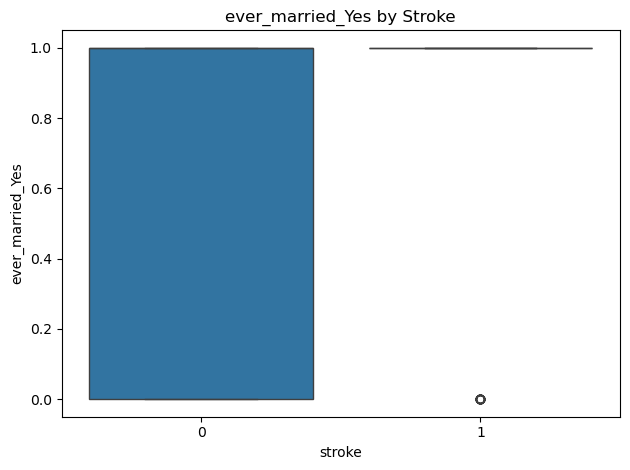

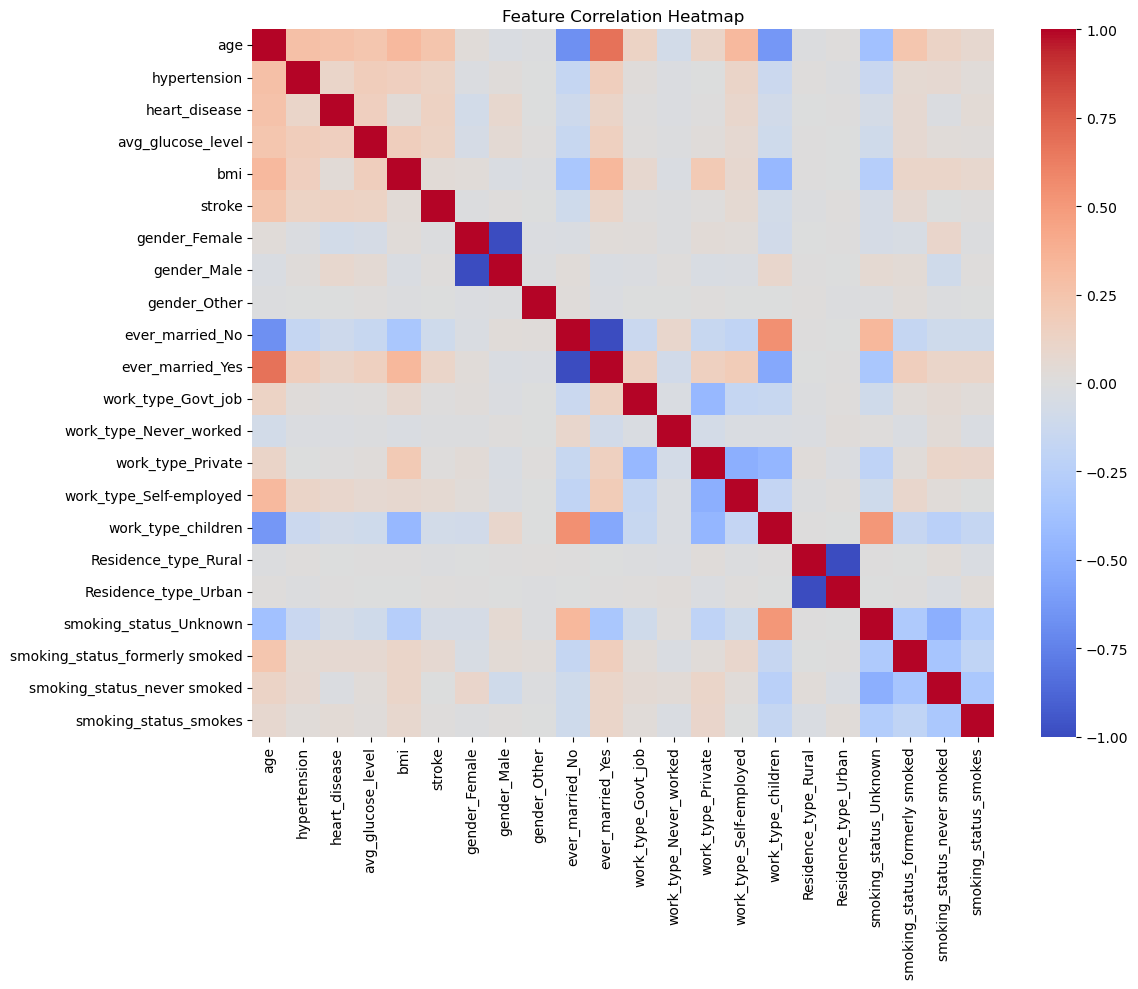

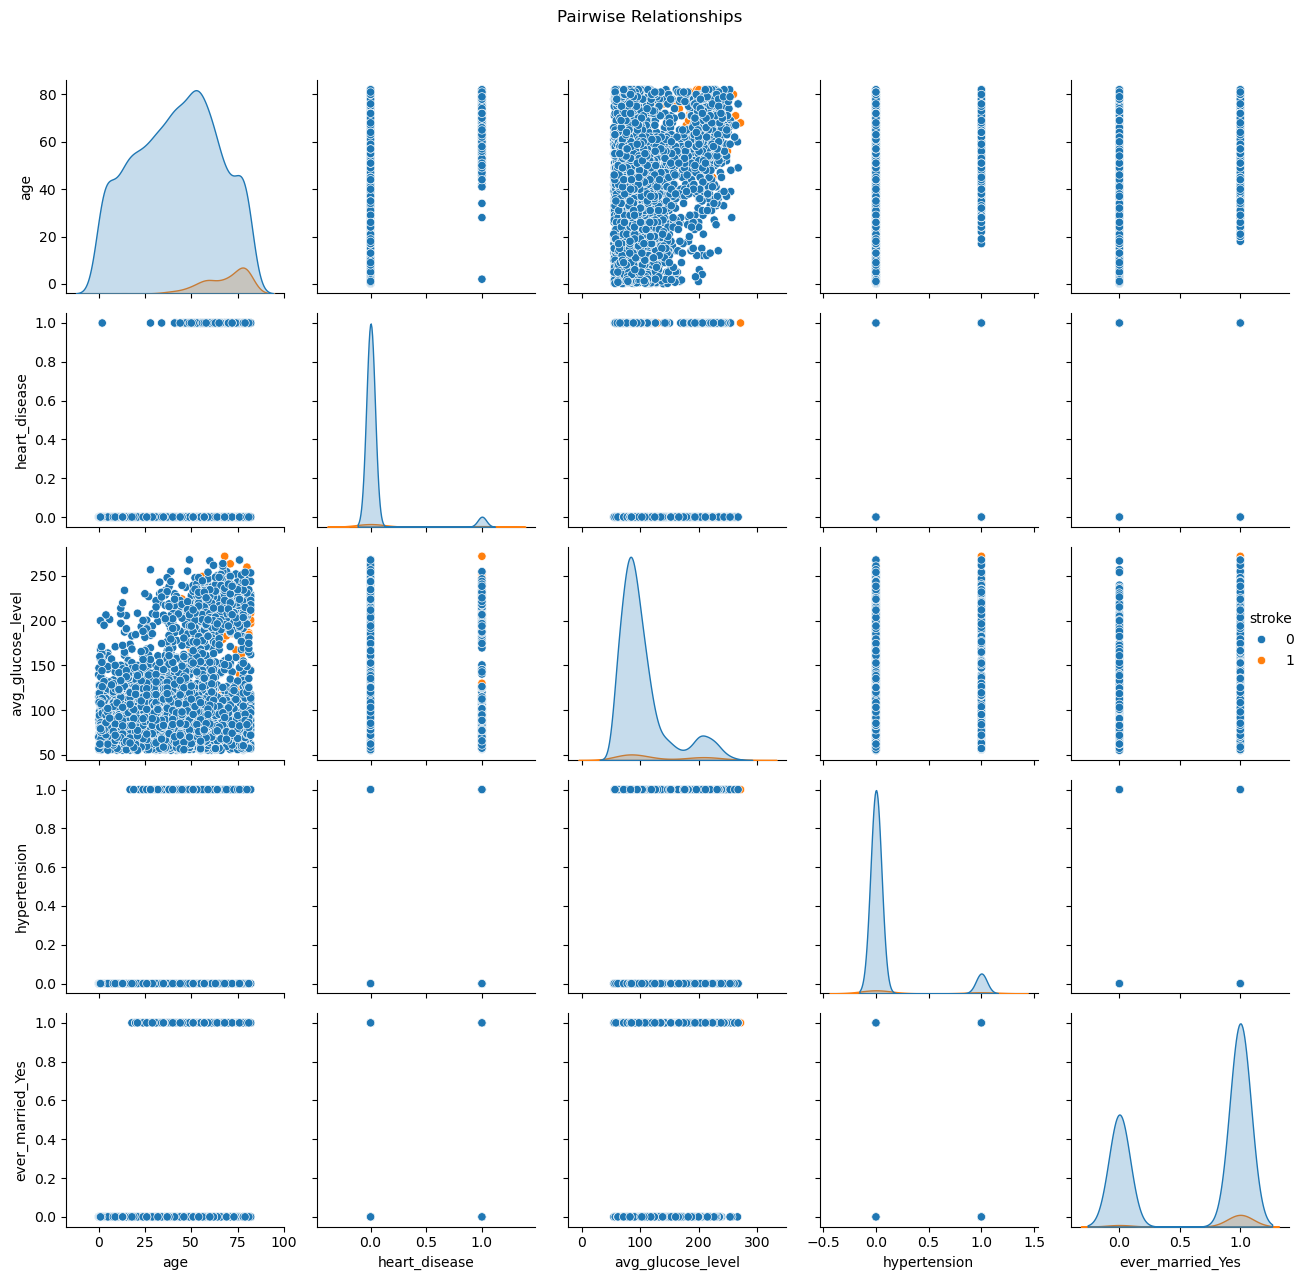

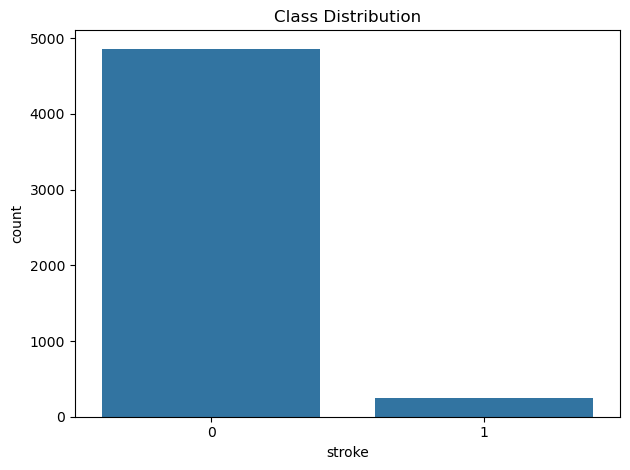

In [79]:
# Process data correlation
# Get top 5 features most correlated with diagnosis
top_features = data.corr()['stroke'].abs().sort_values(ascending=False)[1:6].index

#Histogram, Boxplot, Correlation Heatmap, Pair plot, and Class Distribution. “Thomas Geraci”

#Histogram
def plot_histogram_v1(df, col):
    sns.histplot(df[col], kde=True) # Plots histogram with density curve
    plt.title(f'Distribution of {col}') # Adds plot title
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Boxplot
def plot_boxplot_v1(df, col, target='stroke'):
    sns.boxplot(x=target, y=col, data=df) # Draws boxplot grouped by class
    plt.title(f'{col} by {target.capitalize()}') # Title with capitalized target
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Correlation Heatmap 
def plot_correlation_heatmap_v1(df):
    plt.figure(figsize=(12, 10)) # Sets figure size
    sns.heatmap(df.corr(), cmap='coolwarm') # Draws heatmap with color mapping
    plt.title('Feature Correlation Heatmap') # Adds title
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Pairwise Scatterplots
def plot_pairwise_v1(df, columns, target='stroke'):
    sns.pairplot(data=df, vars=columns, hue=target) # Plots pairwise scatterplots
    plt.suptitle('Pairwise Relationships', y=1.02) # Adds title above figure
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

    #Class Distribution
def plot_class_distribution_v1(df, target='stroke'):
    sns.countplot(x=target, data=df) # Counts of each class in target
    plt.title('Class Distribution') # Adds title
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Loops through each top feature and passes it to the histogram and boxplot functions
for col in top_features:
    plot_histogram_v1(data, col) # Histogram for each top feature
    plot_boxplot_v1(data, col) # Boxplot for each top feature

plot_correlation_heatmap_v1(data) # Heatmap of all correlations
plot_pairwise_v1(data, top_features) # Pairplot of top features
#plot_pairwise_v1(data) # Pairplot of top features
plot_class_distribution_v1(data) # Bar plot of diagnosis classes